In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('data_salary.csv')

In [3]:
df.head()
# salary , rating , name ,size, founded , tye of owner , sector , revenue , or maybe no . of  cometitors on 7/5
#get this code ready tommorow and then get spark to input these 

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"


In [4]:
df.shape

(956, 15)

In [5]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors'],
      dtype='object')

In [6]:
df.isna().sum()

Unnamed: 0           0
Job Title            0
Salary Estimate      0
Job Description      0
Rating               0
Company Name         0
Location             0
Headquarters         0
Size                 0
Founded              0
Type of ownership    0
Industry             0
Sector               0
Revenue              0
Competitors          0
dtype: int64

In [7]:
df["Salary Estimate"]

0       $53K-$91K (Glassdoor est.)
1      $63K-$112K (Glassdoor est.)
2       $80K-$90K (Glassdoor est.)
3       $56K-$97K (Glassdoor est.)
4      $86K-$143K (Glassdoor est.)
                  ...             
951    $72K-$133K (Glassdoor est.)
952     $56K-$91K (Glassdoor est.)
953    $95K-$160K (Glassdoor est.)
954                             -1
955    $61K-$126K (Glassdoor est.)
Name: Salary Estimate, Length: 956, dtype: object

In [8]:
df['hourly'] = df['Salary Estimate'].apply(lambda x: 1 if 'per hour' in x.lower() else 0)
df['employer_provided'] = df['Salary Estimate'].apply(lambda x: 1 if 'employer provided salary:' in x.lower() else 0)


In [9]:
df.columns

Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided'],
      dtype='object')

In [10]:
df["hourly"].unique()

array([0, 1], dtype=int64)

In [11]:
df = df[df['Salary Estimate'] != '-1']
salary = df['Salary Estimate'].apply(lambda x: x.split('(')[0])
minus_Kd = salary.apply(lambda x: x.replace('K','').replace('$',''))

In [12]:
min_hr = minus_Kd.apply(lambda x: x.lower().replace('per hour','').replace('employer provided salary:',''))


In [13]:
df['min_salary'] = min_hr.apply(lambda x: int(x.split('-')[0]))
df['max_salary'] = min_hr.apply(lambda x: int(x.split('-')[1]))
df['avg_salary'] = (df.min_salary+df.max_salary)/2

In [14]:
df["Company Name"].head(5)

0                        Tecolote Research\n3.8
1    University of Maryland Medical System\n3.4
2                                  KnowBe4\n4.8
3                                     PNNL\n3.8
4                       Affinity Solutions\n2.9
Name: Company Name, dtype: object

In [15]:
df['company_txt'] = df.apply(lambda x: x['Company Name'] if x['Rating'] <0 else x['Company Name'][:-3], axis = 1)

In [16]:
df["Location"].nunique()

200

In [17]:
df["Location"].head(5)

0    Albuquerque, NM
1      Linthicum, MD
2     Clearwater, FL
3       Richland, WA
4       New York, NY
Name: Location, dtype: object

In [18]:
df['job_state'] = df['Location'].apply(lambda x: x.split(',')[1])
df.job_state.value_counts()

 CA             151
 MA             103
 NY              72
 VA              41
 IL              40
 MD              35
 PA              33
 TX              28
 WA              21
 NC              21
 NJ              17
 FL              16
 OH              14
 TN              13
 DC              11
 CO              11
 WI              10
 IN              10
 UT              10
 AZ               9
 MO               9
 AL               8
 GA               6
 KY               6
 DE               6
 MI               6
 CT               5
 IA               5
 LA               4
 OR               4
 NE               4
 NM               3
 KS               3
 ID               2
 MN               2
 Los Angeles      1
 RI               1
 SC               1
Name: job_state, dtype: int64

In [19]:
df["job_state"].nunique()

38

In [20]:
df['same_state'] = df.apply(lambda x: 1 if x.Location == x.Headquarters else 0, axis = 1)

In [21]:
df['age'] = df.Founded.apply(lambda x: x if x <1 else 2020 - x)

In [22]:
df.columns


Index(['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age'],
      dtype='object')

In [23]:
df_out = df.drop(['Unnamed: 0'], axis =1)


In [24]:
df_out.to_csv('data_cleaned.csv',index = False)


In [25]:
import matplotlib.pyplot as plt 
import seaborn as sns 

In [26]:
df = pd.read_csv("data_cleaned.csv")

In [27]:
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,same_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,-1,0,0,53,91,72.0,Tecolote Research\n,NM,0,47
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,0,36
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,-1,0,0,80,90,85.0,KnowBe4\n,FL,1,10
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,1,55
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,1,22


In [28]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age'],
      dtype='object')

In [29]:
df.drop(['same_state'],axis=1)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Revenue,Competitors,hourly,employer_provided,min_salary,max_salary,avg_salary,company_txt,job_state,age
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,$50 to $100 million (USD),-1,0,0,53,91,72.0,Tecolote Research\n,NM,47
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,$2 to $5 billion (USD),-1,0,0,63,112,87.5,University of Maryland Medical System\n,MD,36
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,$100 to $500 million (USD),-1,0,0,80,90,85.0,KnowBe4\n,FL,10
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",0,0,56,97,76.5,PNNL\n,WA,55
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",0,0,86,143,114.5,Affinity Solutions\n,NY,22
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
737,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",0,0,58,111,84.5,GSK\n,MA,190
738,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",0,0,72,133,102.5,Eventbrite\n,TN,14
739,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,Unknown / Non-Applicable,-1,0,0,56,91,73.5,Software Engineering Institute\n,PA,36
740,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,$5 to $10 million (USD),-1,0,0,95,160,127.5,"Numeric, LLC\n",PA,-1


In [30]:
def job_simple(title):
    if 'data scientist' in title.lower():
        return 'data scientist'
    elif 'data engineer' in title.lower():
        return 'data engineer'
    elif 'analyst' in title.lower():
        return 'analyst'
    elif 'machine learning' in title.lower():
        return 'mle'
    elif 'manager' in title.lower():
        return 'manager'
    elif 'director' in title.lower():
        return 'director'
    else:
        return 'na'

In [31]:
def seniority(title):
    if 'sr' in title.lower() or 'senior' in title.lower() or 'sr.' in title.lower() or 'lead' in title.lower() or 'principal' in title.lower():
        return 'senior'
    elif 'jr' in title.lower() or 'jr.' in title.lower():
        return 'jr'
    else:
        return 'na'

In [32]:
df['job'] = df['Job Title'].apply(job_simple)
df['seniority'] = df['Job Title'].apply(seniority)

In [33]:
df.job.value_counts()

data scientist    279
na                184
data engineer     119
analyst           102
manager            22
mle                22
director           14
Name: job, dtype: int64

In [34]:
df.seniority.value_counts()

na        520
senior    220
jr          2
Name: seniority, dtype: int64

In [35]:
df['job_state']= df.job_state.apply(lambda x: x.strip() if x.strip().lower() != 'los angeles' else 'CA')
df.job_state.value_counts()


CA    152
MA    103
NY     72
VA     41
IL     40
MD     35
PA     33
TX     28
NC     21
WA     21
NJ     17
FL     16
OH     14
TN     13
DC     11
CO     11
WI     10
UT     10
IN     10
AZ      9
MO      9
AL      8
GA      6
DE      6
KY      6
MI      6
CT      5
IA      5
LA      4
OR      4
NE      4
NM      3
KS      3
ID      2
MN      2
RI      1
SC      1
Name: job_state, dtype: int64

In [36]:
df['desc_len'] = df['Job Description'].apply(lambda x: len(x))
df['desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
737    6162
738    6130
739    3078
740    1642
741    3673
Name: desc_len, Length: 742, dtype: int64

In [37]:
df['num_comp'] = df['Competitors'].apply(lambda x: len(x.split(',')) if x != '-1' else 0)

In [38]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
737                           Pfizer, AstraZeneca, Merck
738                      See Tickets, TicketWeb, Vendini
739                                                   -1
740                                                   -1
741                                                   -1
Name: Competitors, Length: 742, dtype: object

In [39]:
df["num_comp"].head(5)

0    0
1    0
2    0
3    3
4    3
Name: num_comp, dtype: int64

In [40]:
df["min_salary"].head(10)

0     53
1     63
2     80
3     56
4     86
5     71
6     54
7     86
8     38
9    120
Name: min_salary, dtype: int64

In [41]:
df['min_salary'] = df.apply(lambda x: x.min_salary*2 if x.hourly ==1 else x.min_salary, axis =1)
df['max_salary'] = df.apply(lambda x: x.max_salary*2 if x.hourly ==1 else x.max_salary, axis =1)

In [42]:
df[df.hourly ==1][['hourly','min_salary','max_salary']]

,hourly,min_salary,max_salary
165,1,34,48
177,1,42,68
197,1,36,50
202,1,42,68
210,1,30,50
246,1,34,48
271,1,42,68
337,1,36,50
345,1,48,78
357,1,42,68


In [43]:
df['company_txt'] = df.company_txt.apply(lambda x: x.replace('\n', ''))

In [44]:
df['company_txt']

0                          Tecolote Research
1      University of Maryland Medical System
2                                    KnowBe4
3                                       PNNL
4                         Affinity Solutions
                       ...                  
737                                      GSK
738                               Eventbrite
739           Software Engineering Institute
740                             Numeric, LLC
741             Riverside Research Institute
Name: company_txt, Length: 742, dtype: object

In [45]:
df.describe()

,Rating,Founded,hourly,employer_provided,min_salary,max_salary,avg_salary,same_state,age,desc_len,num_comp
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,0.032345,0.022911,74.719677,128.149596,100.626011,0.557951,46.591644,3869.545822,1.053908
std,0.801210,497.183763,0.177034,0.149721,30.980593,45.220324,38.855948,0.496965,53.778815,1521.495868,1.384239
min,-1.000000,-1.000000,0.000000,0.000000,15.000000,16.000000,13.500000,0.000000,-1.000000,407.000000,0.000000
25%,3.300000,1939.000000,0.000000,0.000000,52.000000,96.000000,73.500000,0.000000,11.000000,2801.000000,0.000000
50%,3.700000,1988.000000,0.000000,0.000000,69.500000,124.000000,97.500000,1.000000,24.000000,3731.000000,0.000000
75%,4.000000,2007.000000,0.000000,0.000000,91.000000,155.000000,122.500000,1.000000,59.000000,4740.000000,3.000000
max,5.000000,2019.000000,1.000000,1.000000,202.000000,306.000000,254.000000,1.000000,276.000000,10051.000000,4.000000


In [46]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'job', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

# Plots

* Histograms for various fields that might contribute to the salary predictions.
* Correlation between these fields plotted using diverging palette
* Bar plots of different location and company textas and Headquarters

<AxesSubplot:>

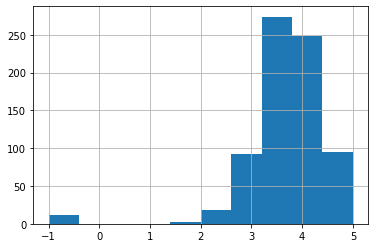

In [47]:
df.Rating.hist()

<AxesSubplot:>

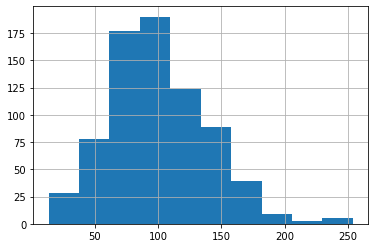

In [48]:
df.avg_salary.hist()

<AxesSubplot:>

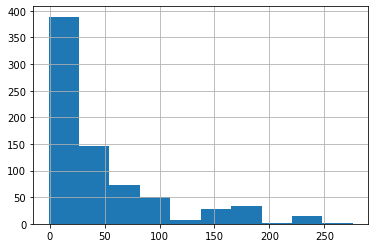

In [49]:
df.age.hist()

<AxesSubplot:>

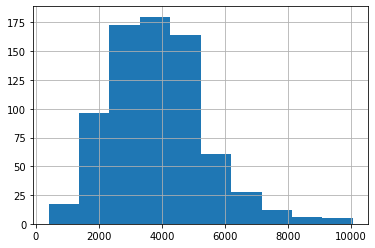

In [50]:
df.desc_len.hist()

In [51]:
df[['age','avg_salary','Rating','desc_len']].corr()

,age,avg_salary,Rating,desc_len
age,1.000000,0.019655,0.021655,0.163911
avg_salary,0.019655,1.000000,0.013492,0.078808
Rating,0.021655,0.013492,1.000000,-0.012281
desc_len,0.163911,0.078808,-0.012281,1.000000


<AxesSubplot:>

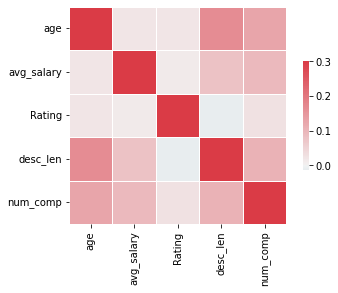

In [52]:
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(df[['age','avg_salary','Rating','desc_len','num_comp']].corr(),vmax=.3, center=0, cmap=cmap,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [53]:
df_cat = df[['Location', 'Headquarters', 'Size','Type of ownership', 'Industry', 'Sector', 'Revenue', 'company_txt', 'job_state','same_state',
        'job', 'seniority']]

graph for Location: total = 20


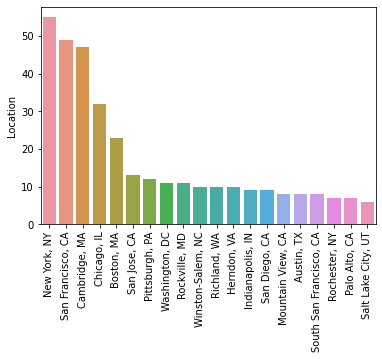

graph for Headquarters: total = 20


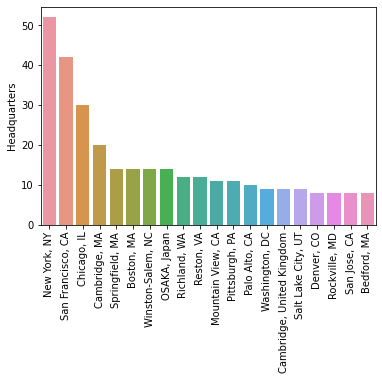

graph for company_txt: total = 20


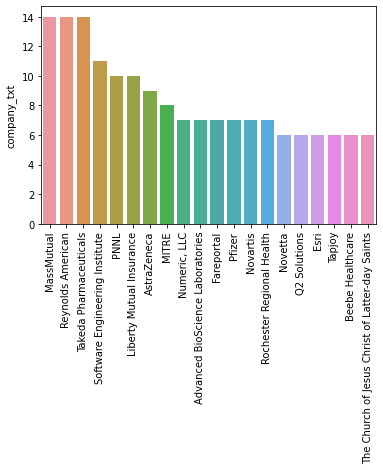

In [54]:
for i in df_cat[['Location','Headquarters','company_txt']].columns:
    cat_num = df_cat[i].value_counts()[:20]
    print("graph for %s: total = %d" % (i, len(cat_num)))
    chart = sns.barplot(x=cat_num.index, y=cat_num)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [55]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'job', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [56]:
pd.pivot_table(df, index = 'job', values = 'avg_salary')

,avg_salary
job,
analyst,65.857843
data engineer,105.403361
data scientist,117.564516
director,168.607143
manager,84.022727
mle,126.431818
na,84.853261


In [57]:
pd.pivot_table(df, index = ['job','seniority'], values = 'avg_salary')

avg_salary
job            seniority            
analyst        jr          56.500000
               na          61.155405
               senior      79.092593
data engineer  na          96.701220
               senior     124.689189
data scientist jr         106.500000
               na         107.043011
               senior     138.956522
director       na         168.607143
manager        na          84.022727
mle            na         119.133333
               senior     142.071429
na             na          73.988189
               senior     109.061404

In [58]:
pd.pivot_table(df, index = ['job_state','job'], values = 'avg_salary').sort_values('job_state', ascending = False)

avg_salary
job_state job                       
WI        na               54.000000
          data scientist  113.500000
          analyst          58.833333
WA        na               97.500000
          data scientist   99.764706
...                              ...
AZ        analyst          55.000000
          na              124.500000
AL        na               43.750000
          data engineer    65.000000
          analyst          62.200000

[114 rows x 1 columns]

In [59]:
pd.options.display.max_rows
pd.set_option('display.max_rows', None)

In [60]:
pd.pivot_table(df, index = ['job_state','job'], values = 'avg_salary', aggfunc = 'count').sort_values('job_state', ascending = False)

avg_salary
job_state job                       
WI        na                       4
          data scientist           3
          analyst                  3
WA        na                       1
          data scientist          17
          analyst                  3
VA        na                       5
          mle                      2
          data scientist          18
          data engineer           10
          analyst                  6
UT        data engineer            3
          analyst                  4
          data scientist           3
TX        na                       7
          data scientist          13
          data engineer            8
TN        data scientist           1
          data engineer           10
          analyst                  2
SC        na                       1
RI        analyst                  1
PA        manager                  3
          data engineer            1
          data scientist           6
          analyst                  8
          mle                      7
          na                       8
OR        data scientist           3
          data engineer            1
OH        na                       3
          data scientist           7
          analyst                  4
NY        na                      12
          mle                      2
          data scientist          40
          data engineer            4
          analyst                 14
NM        data scientist           3
NJ        data scientist           4
          analyst                  6
          data engineer            2
          manager                  2
          director                 2
          na                       1
NE        na                       4
NC        na                      12
          data scientist           3
          data engineer            6
MO        na                       3
          manager                  1
          data scientist           3
          analyst                  2
MN        data engineer            1
          analyst                  1
MI        manager                  2
          data scientist           4
MD        na                      16
          data scientist          13
          data engineer            3
          analyst                  3
MA        na                      46
          manager                  5
          director                 6
          data scientist          30
          data engineer           12
          analyst                  4
LA        analyst                  1
          data engineer            2
          na                       1
KY        na                       4
          data scientist           2
KS        mle                      3
IN        na                       4
          data scientist           2
          data engineer            4
IL        analyst                  3
          na                       6
          mle                      2
          director                 6
          data scientist          15
          data engineer            8
ID        analyst                  2
IA        analyst                  2
          data engineer            3
GA        data scientist           3
          na                       3
FL        data scientist           7
          data engineer            3
          analyst                  6
DE        na                       6
DC        data scientist           5
          data engineer            4
          analyst                  2
CT        na                       3
          data scientist           2
CO        mle                      1
          data engineer            3
          analyst                  1
          na                       3
          data scientist           3
CA        na                      27
          mle                      5
          manager                  9
          data scientist          68
          data engineer           25
          analyst             

In [61]:
pd.pivot_table(df[df.job == 'data scientist'], index = 'job_state', values = 'avg_salary').sort_values('avg_salary', ascending = False)

,avg_salary
job_state,
DC,149.000000
CA,142.522059
UT,140.500000
MO,127.666667
IL,117.233333
NC,117.000000
NY,115.250000
MA,113.750000
WI,113.500000


In [62]:
df_pivots = df[['Rating', 'Industry', 'Sector', 'Revenue', 'num_comp', 'hourly', 'employer_provided', 'Type of ownership','avg_salary']]

# Model Fitting


### Models to be Used 
* Multiple Linear Regression
* Lasso Regression 
* Random Forest


In [63]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 

In [64]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'job', 'seniority',
       'desc_len', 'num_comp'],
      dtype='object')

In [65]:
df = pd.read_csv('data_cleaned.csv')

# choose relevant columns 
df.columns

df_model = df[['avg_salary','Rating','Size','Type of ownership','Sector','Revenue','employer_provided',
             'same_state','age',]]

In [66]:
df_model.head(2)

,avg_salary,Rating,Size,Type of ownership,Sector,Revenue,employer_provided,same_state,age
0,72.0,3.8,501 to 1000 employees,Company - Private,Aerospace & Defense,$50 to $100 million (USD),0,0,47
1,87.5,3.4,10000+ employees,Other Organization,Health Care,$2 to $5 billion (USD),0,0,36


In [67]:
df_model['Size'].unique()

array(['501 to 1000 employees', '10000+ employees',
       '1001 to 5000 employees', '51 to 200 employees',
       '201 to 500 employees', '5001 to 10000 employees',
       '1 to 50 employees', 'Unknown', '-1'], dtype=object)

In [68]:
df_model.drop(df_model[df_model['Size']=='-1'].index,inplace =True)

In [69]:
df_model.drop(df_model[df_model['Size']=='Unknown'].index,inplace =True)

In [70]:

def size(a):
    b=0
    if a =='1 to 50 employees':
        b=25
    elif a=='51 to 200 employees':
        b=125
    elif a=='201 to 500 employees':
        b=350
    elif a=='501 to 1000 employees':
        b=750
    elif a=='1001 to 5000 employees':
        b=3000
    elif a=='5001 to 10000 employees':
        b=7500
    else:
        b=7
    return b

In [71]:
df_model['Size'] = df_model['Size'].apply(size)

In [72]:
df_model.head(2)

,avg_salary,Rating,Size,Type of ownership,Sector,Revenue,employer_provided,same_state,age
0,72.0,3.8,750,Company - Private,Aerospace & Defense,$50 to $100 million (USD),0,0,47
1,87.5,3.4,7,Other Organization,Health Care,$2 to $5 billion (USD),0,0,36


In [73]:
df_model['Revenue'].unique()

array(['$50 to $100 million (USD)', '$2 to $5 billion (USD)',
       '$100 to $500 million (USD)', '$500 million to $1 billion (USD)',
       'Unknown / Non-Applicable', '$1 to $2 billion (USD)',
       '$25 to $50 million (USD)', '$10+ billion (USD)',
       '$1 to $5 million (USD)', '$10 to $25 million (USD)',
       '$5 to $10 billion (USD)', 'Less than $1 million (USD)',
       '$5 to $10 million (USD)'], dtype=object)

In [74]:
df_model.drop(df_model[df_model['Revenue']=='Unknown / Non-Applicable'].index,inplace =True)

In [75]:
df_model['Revenue'].unique()
def rev(a):
    b=0
    if a =='Less than $1 million (USD)':
        b=0.5
    elif a =='$1 to $5 million (USD)':
        b=2.5
    elif a=='$5 to $10 million (USD)':
        b=7.5
    elif a=='$10 to $25 million (USD)':
        b=17.5
    elif a=='$25 to $50 million (USD)':
        b=37.5
    elif a=='$50 to $100 million (USD)':
        b=75
    elif a=='$100 to $500 million (USD)':
        b=300
    elif a=='$500 million to $1 billion (USD)':
        b=750
    elif a=='$1 to $2 billion (USD)':
        b=1500
    elif a=='$2 to $5 billion (USD)':
        b=3500
    elif a=='$5 to $10 billion (USD)':
        b=7500
    elif a=='$10+ billion (USD)':
        b=10000
    else:
        b=0
    return b

In [76]:
df_model['Revenue'] = df_model['Revenue'].apply(rev)

In [77]:
df_model.head(2)

,avg_salary,Rating,Size,Type of ownership,Sector,Revenue,employer_provided,same_state,age
0,72.0,3.8,750,Company - Private,Aerospace & Defense,75.0,0,0,47
1,87.5,3.4,7,Other Organization,Health Care,3500.0,0,0,36


In [78]:
df_model['Type of ownership'].unique()

array(['Company - Private', 'Other Organization', 'Government',
       'Company - Public', 'Hospital', 'Nonprofit Organization',
       'Subsidiary or Business Segment', 'Unknown',
       'School / School District'], dtype=object)

In [79]:
df_model.drop(df_model[df_model['Type of ownership']=='Unknown'].index,inplace =True)

In [80]:
def owner(a):
    b=0
    if a =='Company - Private':
        b=1
    elif a =='Company - Public':
        b=2
    elif a=='Government':
        b=3
    else:
        b=4
    return b

In [81]:
df_model['Type of ownership'] = df_model['Type of ownership'].apply(owner)

In [82]:
df_model.head(2)

,avg_salary,Rating,Size,Type of ownership,Sector,Revenue,employer_provided,same_state,age
0,72.0,3.8,750,1,Aerospace & Defense,75.0,0,0,47
1,87.5,3.4,7,4,Health Care,3500.0,0,0,36


In [83]:
df_model['employer_provided'].unique()

array([0, 1], dtype=int64)

In [84]:
df_model['Sector'].unique()

array(['Aerospace & Defense', 'Health Care', 'Business Services',
       'Oil, Gas, Energy & Utilities', 'Real Estate',
       'Information Technology', 'Retail', 'Biotech & Pharmaceuticals',
       'Insurance', 'Transportation & Logistics', 'Finance',
       'Telecommunications', '-1', 'Manufacturing', 'Mining & Metals',
       'Government', 'Agriculture & Forestry', 'Media', 'Education',
       'Arts, Entertainment & Recreation', 'Travel & Tourism',
       'Non-Profit', 'Accounting & Legal', 'Consumer Services'],
      dtype=object)

In [85]:
df_model.drop(df_model[df_model['Sector']=='-1'].index,inplace =True)

In [86]:
def sector(a):
    b=0
    if a =='Information Technology':
        b=1
    elif a =='Oil, Gas, Energy & Utilities':
        b=2
    elif a=='Government':
        b=3
    elif a=='Real Estate':
        b=4
    else:
        b=5
    return b

In [87]:
df_model['Sector'] = df_model['Sector'].apply(sector)

In [88]:
df_model.head()

,avg_salary,Rating,Size,Type of ownership,Sector,Revenue,employer_provided,same_state,age
0,72.0,3.8,750,1,5,75.0,0,0,47
1,87.5,3.4,7,4,5,3500.0,0,0,36
2,85.0,4.8,750,1,5,300.0,0,1,10
3,76.5,3.8,3000,3,2,750.0,0,1,55
5,95.0,3.4,350,2,4,1500.0,0,1,20


In [89]:
df_model['Size'].unique()

array([ 750,    7, 3000,  350,  125, 7500,   25], dtype=int64)

In [90]:
for i in df_model.columns:
    print(i)

avg_salary
Rating
Size
Type of ownership
Sector
Revenue
employer_provided
same_state
age


In [91]:
from sklearn.model_selection import train_test_split

X = df_model.drop('avg_salary', axis =1)
y = df_model.avg_salary.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [92]:
import statsmodels.api as sm

X_sm = X = sm.add_constant(X)
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     10.94
Date:                Sun, 08 May 2022   Prob (F-statistic):           2.49e-14
Time:                        16:07:23   Log-Likelihood:                -2685.3
No. Observations:                 536   AIC:                             5389.
Df Residuals:                     527   BIC:                             5427.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                80.1388     13.583      5.900      0.000      53.455     106.823
Rating                8.0146      3.051      2.627      0.009       2.021      14.009
Size                 -0.0012      0.001     -1.876      0.061      -0.003    5.84e-05
Type of ownership    -5.2167      1.538     -3.392      0.001      -8.238      -2.196
Sector               -1.3985      1.039     -1.346      0.179      -3.440       0.643
Revenue               0.0027      0.001      5.247      0.000       0.002       0.004
employer_provided   159.7200     30.287      5.274      0.000     100.222     219.218
same_state           -0.2490      3.313     -0.075      0.940      -6.757       6.259
age                  -0.0318      0.037     -0.853      0.394      -0.105       0.041
==============================================================================
Omnibus:                       22.897   Durbin-Watson:                   2.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.747
Skew:                           0.494   Prob(JB):                     4.23e-06
Kurtosis:                       3.361   Cond. No.                     1.06e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [93]:

from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(X_train, y_train)

np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-29.727534567427924

In [94]:
list(X_test.iloc[1,:])

[4.0, 125.0, 1.0, 1.0, 7.5, 0.0, 1.0, 18.0]

In [95]:
lm.predict(np.array([4.0, 125.0, 1.0, 1.0, 7.5, 0.0, 1.0, 18.0]).reshape(1,-1))

array([105.16962793])

In [96]:
X.head()

,const,Rating,Size,Type of ownership,Sector,Revenue,employer_provided,same_state,age
0,1.0,3.8,750,1,5,75.0,0,0,47
1,1.0,3.4,7,4,5,3500.0,0,0,36
2,1.0,4.8,750,1,5,300.0,0,1,10
3,1.0,3.8,3000,3,2,750.0,0,1,55
5,1.0,3.4,350,2,4,1500.0,0,1,20


In [167]:
import pickle
filename = 'modellm.pkl'
pickle.dump(lm, open(filename, 'wb'))

In [168]:
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model.predict(np.array([1.0, 2.0, 0.0, 2.0, 2.0, 0.0, 1.0, 18.0]).reshape(1,-1))

array([88.29556727])

,alpha,error
5,0.06,-29.716512


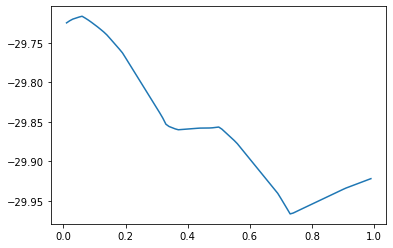

In [97]:
# lasso regression 
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

alpha = []
error = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))
    
plt.plot(alpha,error)

err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]


In [98]:

# random forest 
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-21.584363066172227

In [99]:
import pickle
filename = 'model.pkl'
pickle.dump(rf, open(filename, 'wb'))